# matplotlib with pandas

* padnas 0.7 이후 부터 pandas bulit-in matplotlib 지원!
* DataFrame or Serires 별로 그래프 생성 가능

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [6]:
data_url = './data/housing.data'
df_data = pd.read_csv(data_url, sep='\s+', header=None)
df_data.columns = [
    'CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV'] 
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


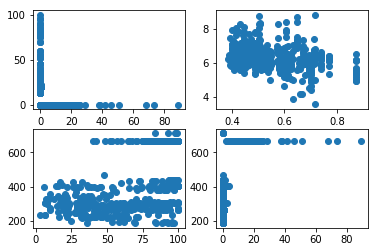

In [9]:
fig = plt.figure()
ax = []

for i in range(1, 5):
    ax.append(fig.add_subplot(2, 2, i))

ax[0].scatter(df_data['CRIM'], df_data['ZN'])
ax[1].scatter(df_data['NOX'], df_data['RM'])
ax[2].scatter(df_data['AGE'], df_data['TAX'])
ax[3].scatter(df_data['CRIM'], df_data['TAX'])
plt.show()

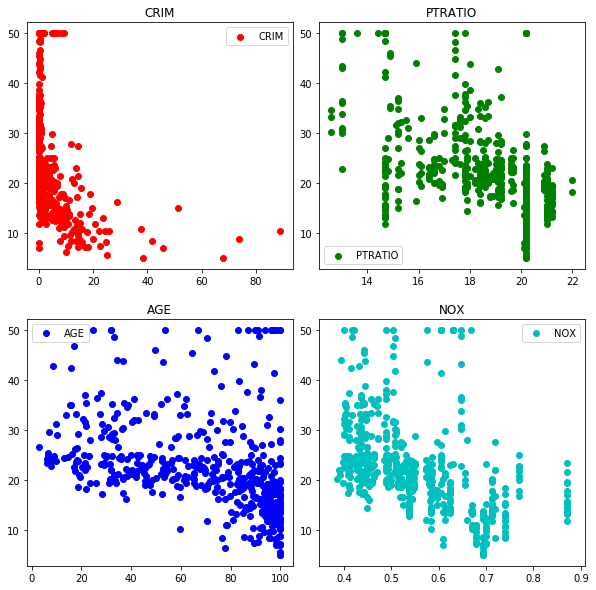

In [22]:
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
ax = []

for i in range(1, 5):
    ax.append(fig.add_subplot(2, 2, i))
        
columns = ["CRIM", "PTRATIO", "AGE", "NOX"]
colors = ['r', 'g', 'b', 'c']

for i in range(4):
    ax[i].scatter(df_data[columns[i]], df_data['MEDV'], c=colors[i], label=columns[i])
    ax[i].legend()
    ax[i].set_title(columns[i])

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

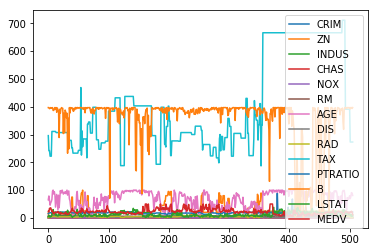

In [23]:
df_data.plot()
plt.show()

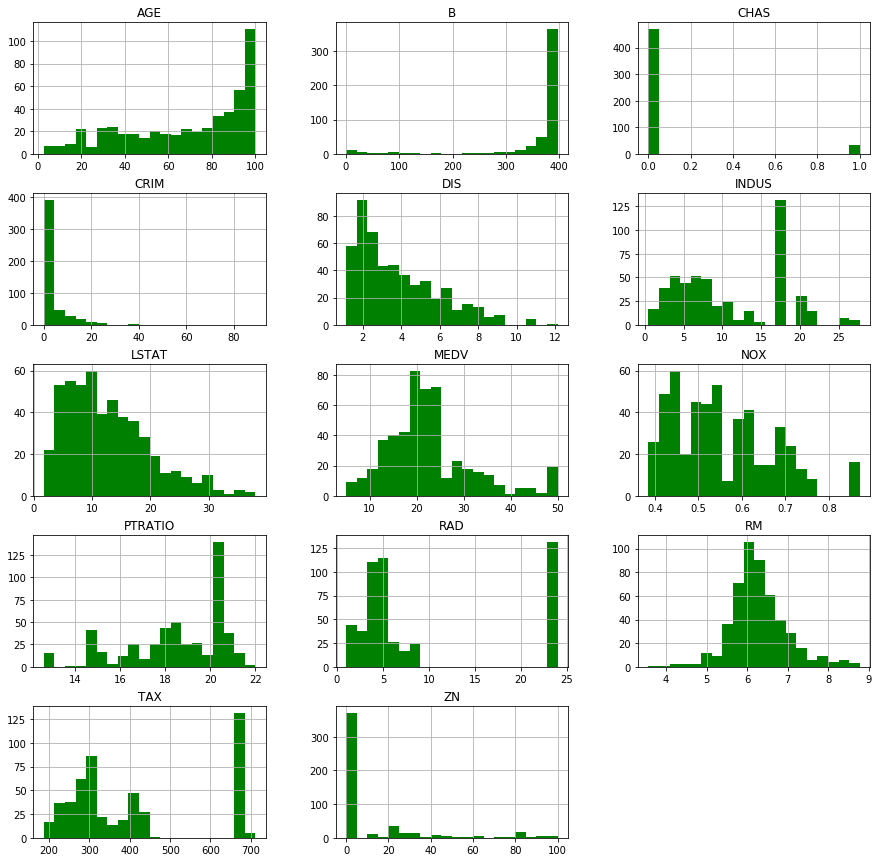

In [52]:
fig = plt.figure()
fig.set_size_inches(15, 15)

for i in range(1, 15):
    fig.add_subplot(5, 3, i)

colors = np.random.rand(14)

df_data.hist(bins=20, ax=fig.get_axes(), color='g')
plt.show()

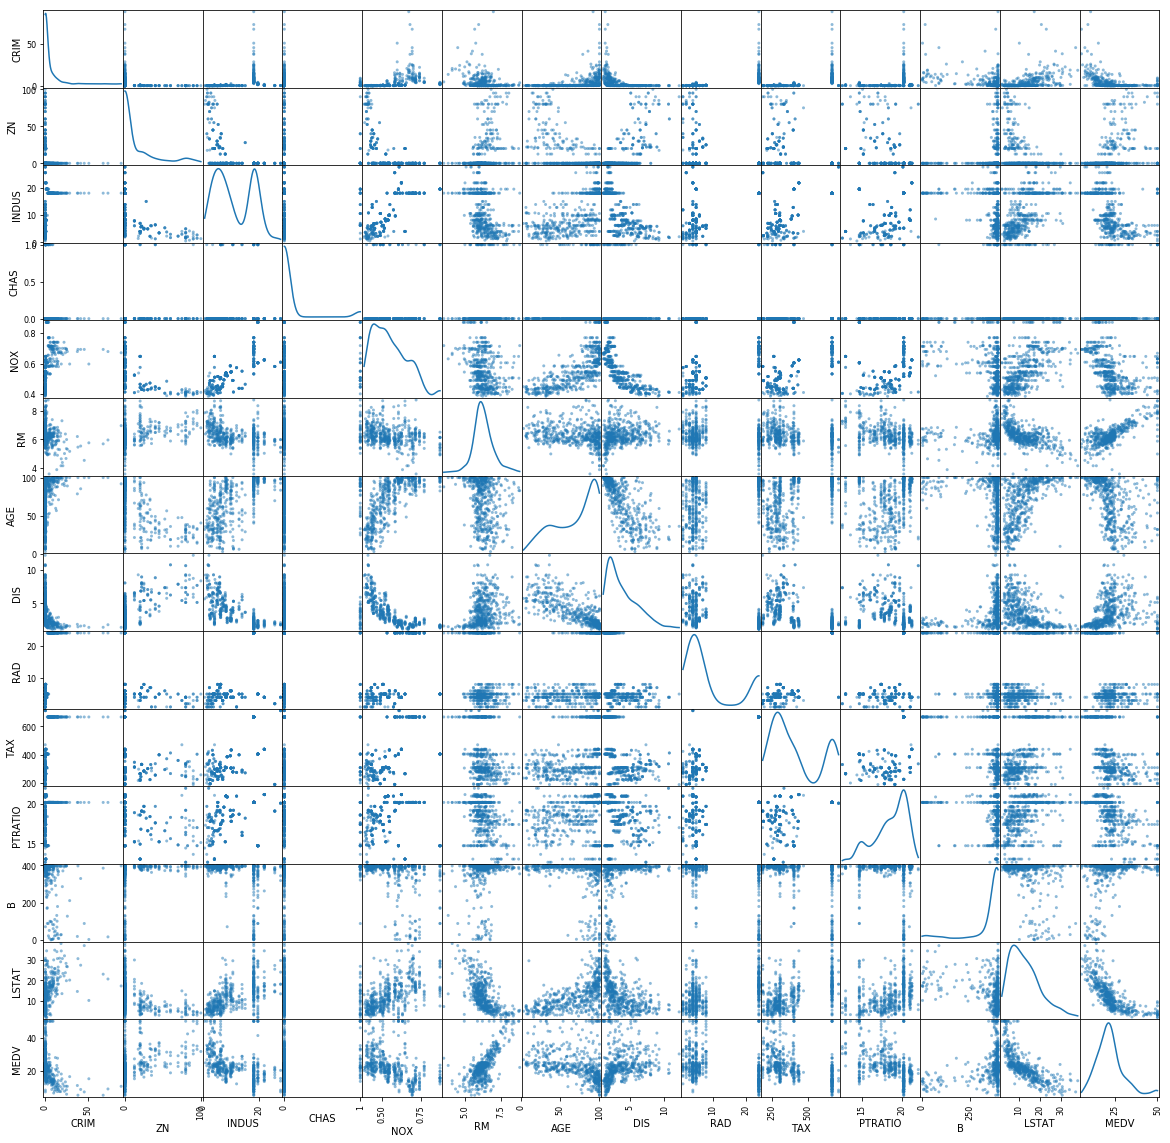

In [57]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_data, diagonal='kde', figsize=(20,20))
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scale_data = std_scalar.fit_transform(df_data)
scale_data

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [59]:
scale_data.shape

(506, 14)

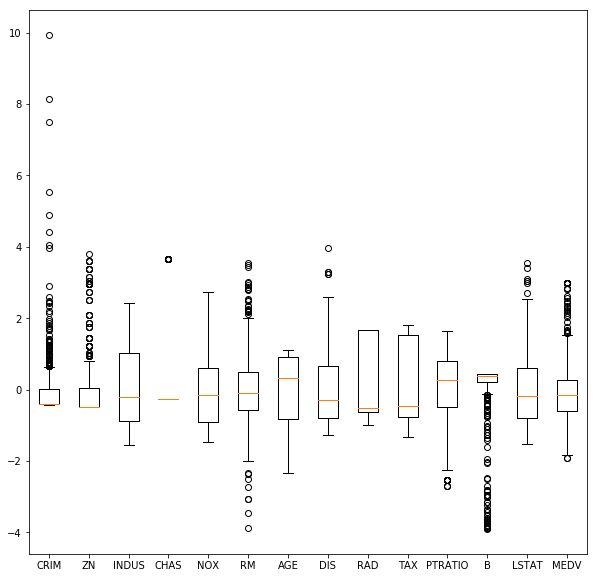

In [61]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(scale_data, labels=df_data.columns)
plt.show()

In [64]:
corr_data = np.corrcoef(scale_data.T)
corr_data.shape

(14, 14)

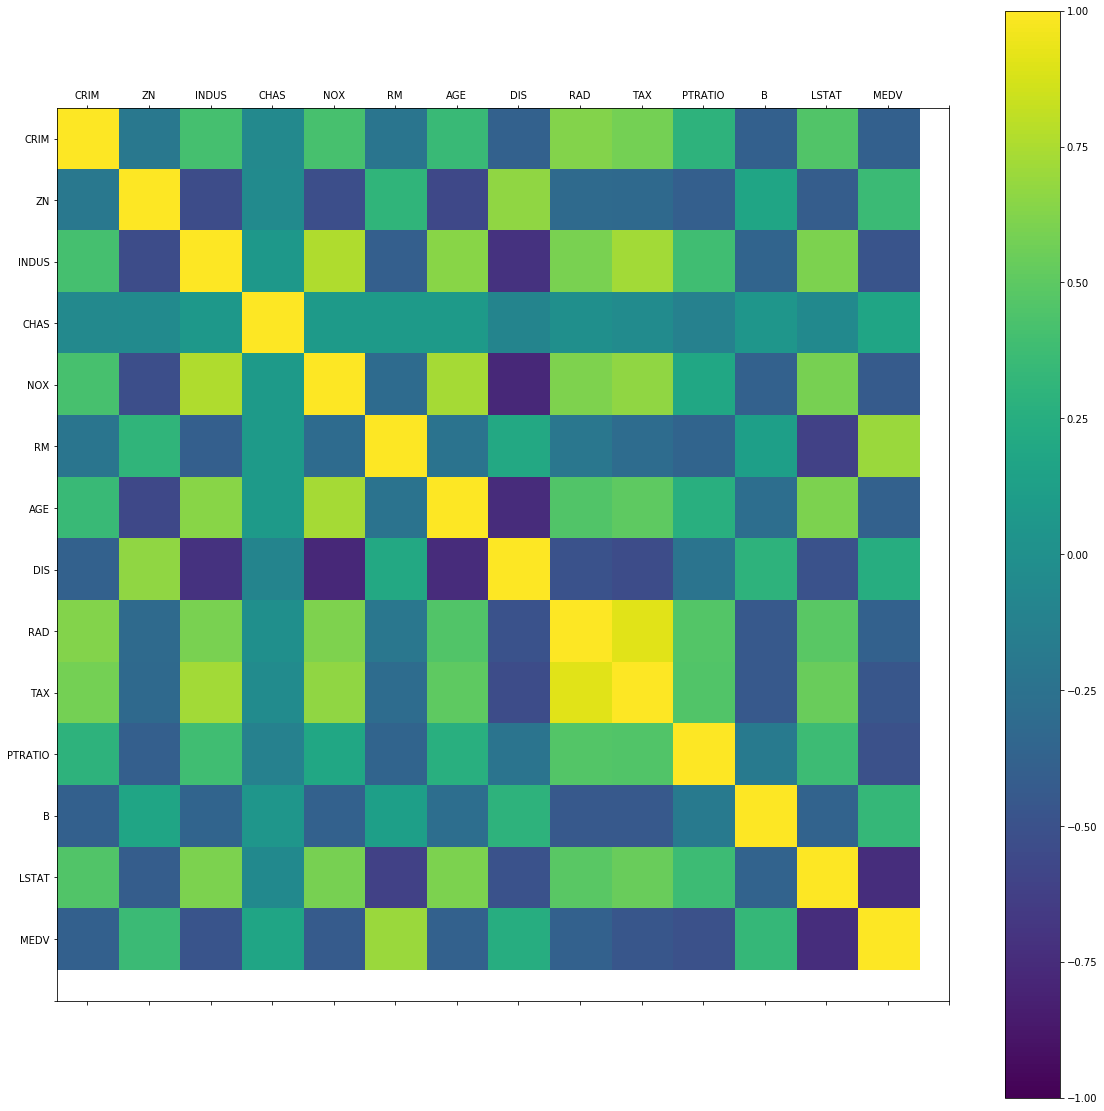

In [69]:
fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 15, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_data.columns)
ax.set_yticklabels(df_data.columns)

plt.show()